# Perceptron


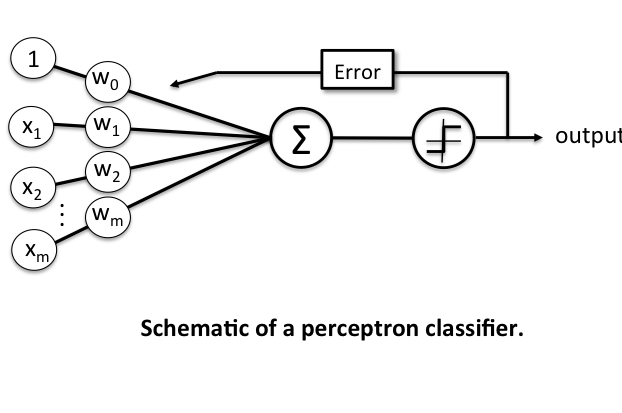

The Perceptron is a fundamental linear binary classifier that learns a decision boundary to separate two classes using gradient-based weight updates.
In this notebook, we implement a Perceptron from scratch to predict hotel booking cancellations based on selected features from the dataset. 

We will use two features from our data set: number of adults and children
as our input signals and corresponding labels. We will try to predict the number of cancellations using these measurements and labels.

In [65]:

# make sure to pip install mlxtend

#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

#load data into a pandas dataframe
df = pd.read_csv('Datasets/hotel.csv')





In [66]:
df.iloc[:100]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Canceled,2015-06-29
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,...,No Deposit,242.0,NaN,0,Transient,117.00,0,1,Canceled,2015-05-13
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,...,No Deposit,105.0,NaN,0,Transient,196.54,0,1,Check-Out,2015-07-10
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,No Deposit,240.0,NaN,0,Transient,99.30,1,2,Check-Out,2015-07-10


***
The Perceptron is a binary classifier that can be used for linearly separable data. 
Thus, I will choose two properties of the hotels data to implement and train the perceptron on. 

I will focus on the number of adults and number of children properties.

In [ ]:

#store whether booking is canceled or not in the numpy array y
y = df.iloc[:500].is_canceled.values

#convert every "1" meaning canceled to 1 and every "0" meaning not canceled to -1
y=np.where(y==1, 1, -1)


X = df.iloc[:500][['adults', 'children']].values



### Implementing the Perceptron Algorithm

Below is the full implementation of the Perceptron class, including methods to compute predictions, train the model via weight updates, and track misclassification errors at each epoch.


In [75]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
 


***
I will next instantiate an instance of the Perceptron class and also train this model over 10000 epochs by running the following code.


In [76]:


#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#instantiate the Perceptron
classifier= Perceptron(epochs=1000)

classifier.train(X_train, y_train)
# make predictions on the test set
y_pred = classifier.predict(X_test)







### Visualizing the Learned Decision Boundary

We can now visualize our results.
The plot below shows the decision boundary learned by the Perceptron. The decision surface separates predicted cancellations (`1`) and non-cancellations (`-1`).


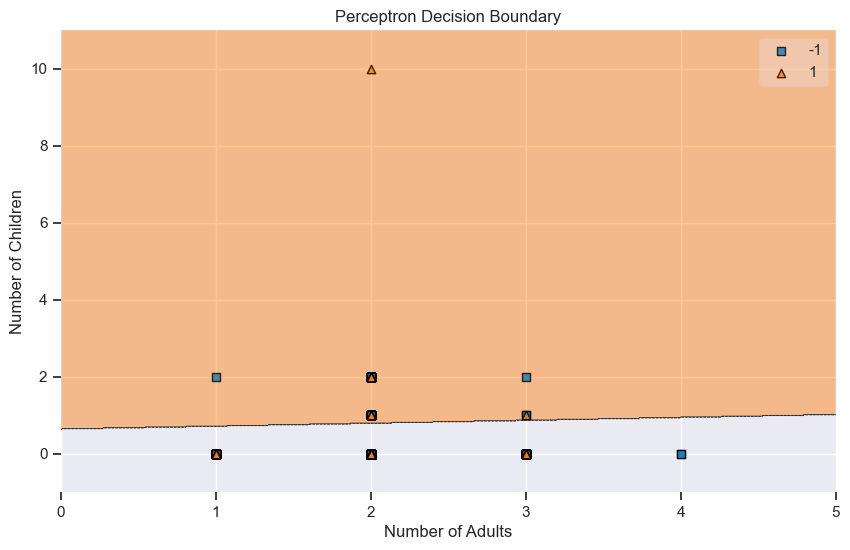

In [77]:
plt.figure(figsize=(10,6))
plot_decision_regions(X, y, clf=classifier)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Children')
plt.show()


We can take a look at the errors over each epoch. We visualize how this number of misclassifications changes over epochs.

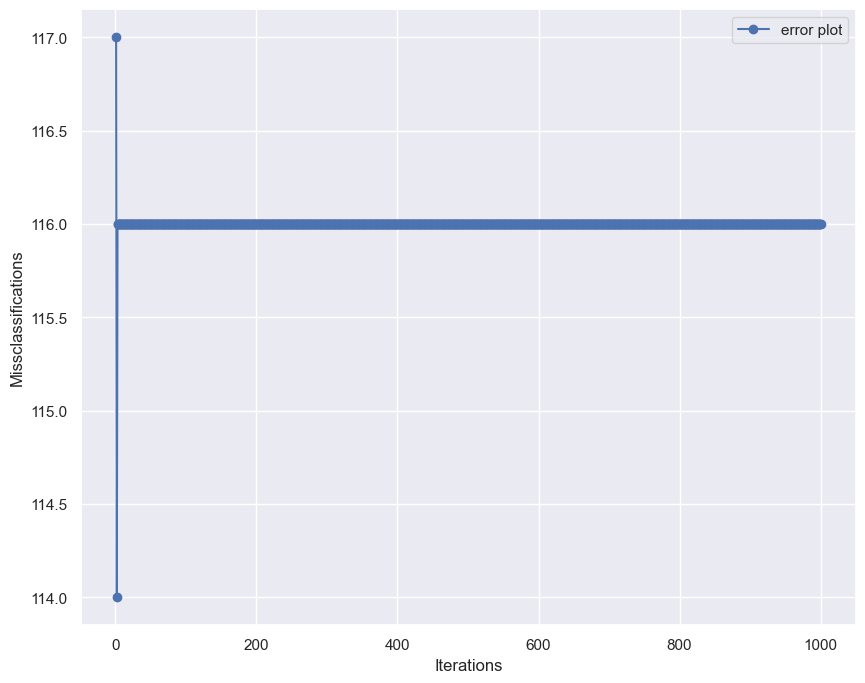

In [78]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(classifier.errors_)+1), classifier.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

This error plateau suggests limitations in the Perceptron's ability to fully separate the data.

In an attempt to get a better outcome, I also tested passing in other features: below is my graph when passing in the "lead time" (number of days between booking and arrival) and "previous cancellations" features.

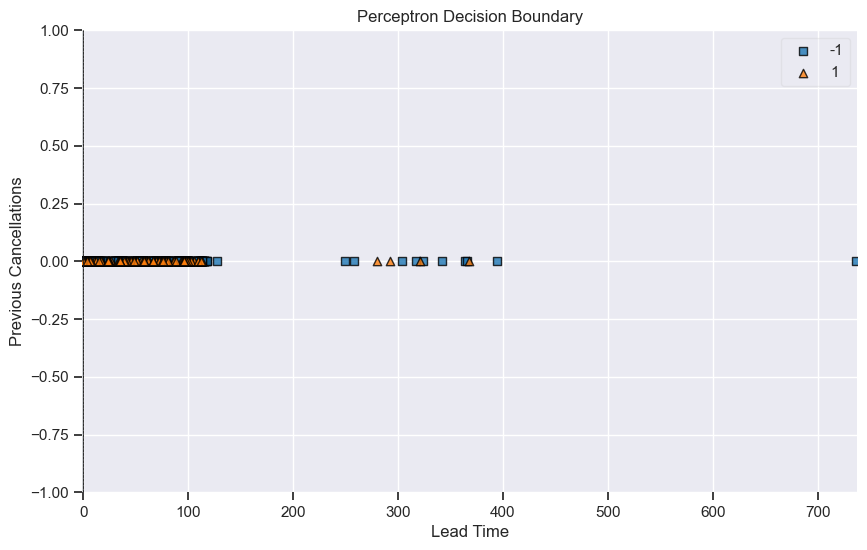

As we can see, many points are mashed together. Below is the error plot:

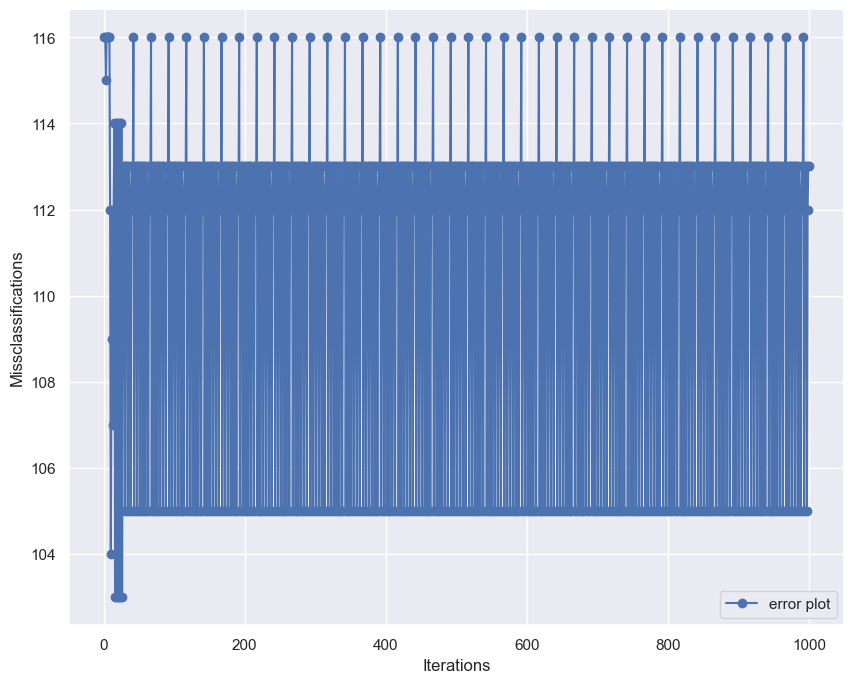

Another combination: lead time and number of special requests made when booking.

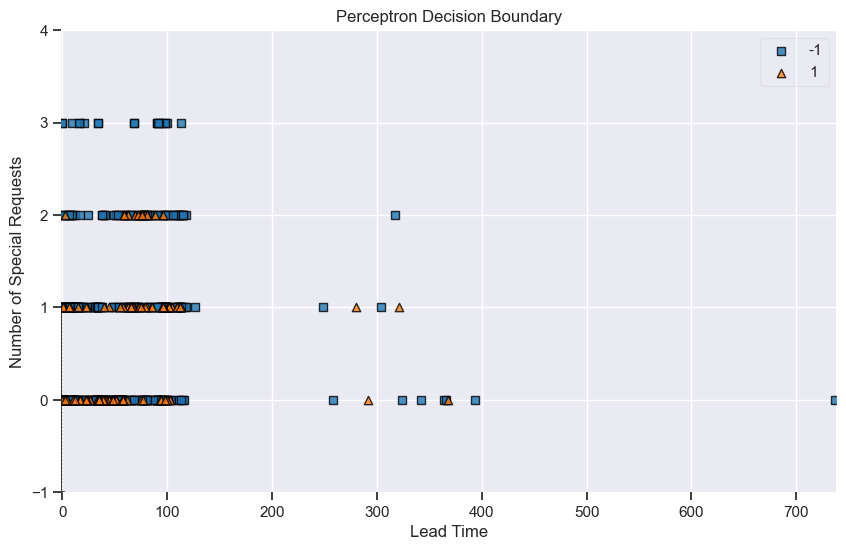

The error plot:

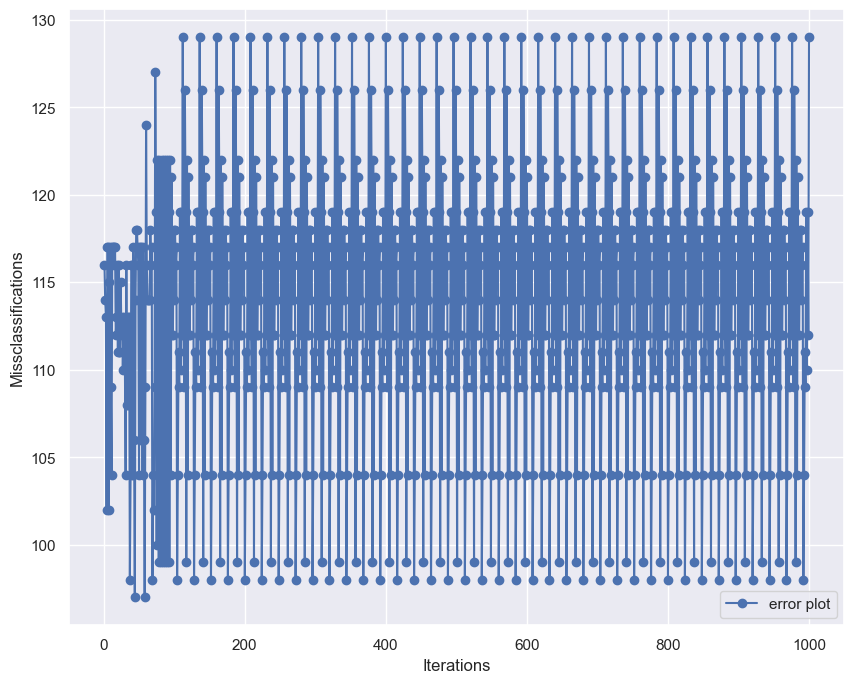

# Conlusion/Findings
Through implementing a Perceptron model from scratch and testing it on the binary classficiation task using hotel booking data, we observed the Perceptron's limitation when it comes to non-linearly separable data. We could see this through insights from decision boundaries, which showed how well/poorly the classifier was splitting the classes in feature space.

Moreover, error plots were helpful in diagnosing convergence and performance. Flat or oscillating error lines indicated that the Perceptron was unable to improve further.
Using more complex models (e.g. neural networks) could yielf better results when tasked with working on non-linear problems.